## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  61.410936   657.186888  0.432752  5.462671  1.274241
1  62.455850  1351.609337  0.945388  8.270560  1.488261
2  29.243414  1318.700757  0.382048  1.171507  1.514105
3  27.738228   871.473215  0.296034  1.721910  1.445159
4  13.130005  1242.546600  0.614831  2.379588  1.364803


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.16603 | train_mse: 5.77424 | train_mae: 1.93918 |  0:00:00s
epoch 1  | loss: 0.74648 | train_mse: 3.45229 | train_mae: 1.49661 |  0:00:00s
epoch 2  | loss: 0.5894  | train_mse: 2.31413 | train_mae: 1.24123 |  0:00:00s


epoch 3  | loss: 0.49261 | train_mse: 2.56013 | train_mae: 1.22219 |  0:00:00s
epoch 4  | loss: 0.60936 | train_mse: 1.6033  | train_mae: 0.94146 |  0:00:00s
epoch 5  | loss: 0.48787 | train_mse: 1.16481 | train_mae: 0.74896 |  0:00:00s
epoch 6  | loss: 0.46344 | train_mse: 1.09673 | train_mae: 0.73035 |  0:00:00s


epoch 7  | loss: 0.33961 | train_mse: 0.91255 | train_mae: 0.66948 |  0:00:00s
epoch 8  | loss: 0.32767 | train_mse: 0.6812  | train_mae: 0.60593 |  0:00:00s
epoch 9  | loss: 0.34617 | train_mse: 0.5163  | train_mae: 0.484   |  0:00:00s
epoch 10 | loss: 0.33227 | train_mse: 0.62866 | train_mae: 0.55431 |  0:00:00s


epoch 11 | loss: 0.27636 | train_mse: 0.38527 | train_mae: 0.46416 |  0:00:01s
epoch 12 | loss: 0.31484 | train_mse: 0.45344 | train_mae: 0.50733 |  0:00:01s
epoch 13 | loss: 0.25108 | train_mse: 1.00481 | train_mae: 0.64262 |  0:00:01s


epoch 14 | loss: 0.21066 | train_mse: 0.45372 | train_mae: 0.48141 |  0:00:01s
epoch 15 | loss: 0.42917 | train_mse: 0.30326 | train_mae: 0.39008 |  0:00:01s
epoch 16 | loss: 0.37078 | train_mse: 0.33659 | train_mae: 0.41407 |  0:00:01s
epoch 17 | loss: 0.45915 | train_mse: 0.36875 | train_mae: 0.45314 |  0:00:01s


epoch 18 | loss: 0.39369 | train_mse: 0.39432 | train_mae: 0.48726 |  0:00:01s
epoch 19 | loss: 0.29025 | train_mse: 0.28908 | train_mae: 0.41323 |  0:00:01s
epoch 20 | loss: 0.23863 | train_mse: 0.28324 | train_mae: 0.41115 |  0:00:01s
epoch 21 | loss: 0.2858  | train_mse: 0.28473 | train_mae: 0.42062 |  0:00:01s


epoch 22 | loss: 0.25493 | train_mse: 0.2325  | train_mae: 0.39216 |  0:00:01s
epoch 23 | loss: 0.23135 | train_mse: 0.39962 | train_mae: 0.48411 |  0:00:01s
epoch 24 | loss: 0.34954 | train_mse: 0.4072  | train_mae: 0.49242 |  0:00:01s
epoch 25 | loss: 0.24076 | train_mse: 0.34012 | train_mae: 0.44539 |  0:00:01s


epoch 26 | loss: 0.17683 | train_mse: 0.32275 | train_mae: 0.43118 |  0:00:02s
epoch 27 | loss: 0.16343 | train_mse: 0.27777 | train_mae: 0.40416 |  0:00:02s
epoch 28 | loss: 0.14062 | train_mse: 0.31436 | train_mae: 0.42523 |  0:00:02s


epoch 29 | loss: 0.17244 | train_mse: 0.35642 | train_mae: 0.45127 |  0:00:02s
epoch 30 | loss: 0.1651  | train_mse: 0.33767 | train_mae: 0.43179 |  0:00:02s
epoch 31 | loss: 0.20988 | train_mse: 0.33301 | train_mae: 0.42305 |  0:00:02s
epoch 32 | loss: 0.22933 | train_mse: 0.2652  | train_mae: 0.3893  |  0:00:02s


epoch 33 | loss: 0.23603 | train_mse: 0.20488 | train_mae: 0.3548  |  0:00:02s
epoch 34 | loss: 0.28444 | train_mse: 0.22663 | train_mae: 0.33154 |  0:00:02s
epoch 35 | loss: 0.15426 | train_mse: 0.20974 | train_mae: 0.31686 |  0:00:02s
epoch 36 | loss: 0.17024 | train_mse: 0.20661 | train_mae: 0.34213 |  0:00:02s


epoch 37 | loss: 0.13755 | train_mse: 0.18008 | train_mae: 0.32991 |  0:00:02s
epoch 38 | loss: 0.13721 | train_mse: 0.1655  | train_mae: 0.30052 |  0:00:02s
epoch 39 | loss: 0.15329 | train_mse: 0.13603 | train_mae: 0.28406 |  0:00:02s


epoch 40 | loss: 0.24018 | train_mse: 0.15348 | train_mae: 0.29374 |  0:00:02s
epoch 41 | loss: 0.23881 | train_mse: 0.24968 | train_mae: 0.31422 |  0:00:03s
epoch 42 | loss: 0.21374 | train_mse: 0.14649 | train_mae: 0.28976 |  0:00:03s


epoch 43 | loss: 0.15756 | train_mse: 0.13714 | train_mae: 0.27842 |  0:00:03s
epoch 44 | loss: 0.19138 | train_mse: 0.12189 | train_mae: 0.26434 |  0:00:03s


epoch 45 | loss: 0.20188 | train_mse: 0.1459  | train_mae: 0.29336 |  0:00:03s


epoch 46 | loss: 0.20113 | train_mse: 0.17168 | train_mae: 0.31668 |  0:00:04s
epoch 47 | loss: 0.13998 | train_mse: 0.14562 | train_mae: 0.29226 |  0:00:04s


epoch 48 | loss: 0.17141 | train_mse: 0.12489 | train_mae: 0.25881 |  0:00:04s
epoch 49 | loss: 0.15399 | train_mse: 0.11471 | train_mae: 0.24645 |  0:00:04s


epoch 50 | loss: 0.27699 | train_mse: 0.14248 | train_mae: 0.26725 |  0:00:04s
epoch 51 | loss: 0.13333 | train_mse: 0.15751 | train_mae: 0.27995 |  0:00:04s
epoch 52 | loss: 0.2677  | train_mse: 0.15098 | train_mae: 0.27121 |  0:00:04s


epoch 53 | loss: 0.31746 | train_mse: 0.13027 | train_mae: 0.25889 |  0:00:05s
epoch 54 | loss: 0.17611 | train_mse: 0.13688 | train_mae: 0.29255 |  0:00:05s


epoch 55 | loss: 0.22428 | train_mse: 0.14388 | train_mae: 0.29729 |  0:00:05s
epoch 56 | loss: 0.16557 | train_mse: 0.13681 | train_mae: 0.27932 |  0:00:05s
epoch 57 | loss: 0.17184 | train_mse: 0.1503  | train_mae: 0.29456 |  0:00:05s


epoch 58 | loss: 0.11321 | train_mse: 0.13943 | train_mae: 0.28957 |  0:00:05s
epoch 59 | loss: 0.12377 | train_mse: 0.11612 | train_mae: 0.27058 |  0:00:05s
epoch 60 | loss: 0.14256 | train_mse: 0.13235 | train_mae: 0.286   |  0:00:05s
epoch 61 | loss: 0.1074  | train_mse: 0.1275  | train_mae: 0.27612 |  0:00:05s


epoch 62 | loss: 0.14484 | train_mse: 0.13837 | train_mae: 0.29526 |  0:00:05s
epoch 63 | loss: 0.12514 | train_mse: 0.12839 | train_mae: 0.26927 |  0:00:05s
epoch 64 | loss: 0.12934 | train_mse: 0.09205 | train_mae: 0.24371 |  0:00:05s
epoch 65 | loss: 0.2432  | train_mse: 0.08558 | train_mae: 0.23199 |  0:00:06s


epoch 66 | loss: 0.32834 | train_mse: 0.20646 | train_mae: 0.31919 |  0:00:06s
epoch 67 | loss: 0.2642  | train_mse: 0.16752 | train_mae: 0.29604 |  0:00:06s
epoch 68 | loss: 0.24804 | train_mse: 0.10399 | train_mae: 0.24724 |  0:00:06s


epoch 69 | loss: 0.13356 | train_mse: 0.10184 | train_mae: 0.24508 |  0:00:06s
epoch 70 | loss: 0.23016 | train_mse: 0.13548 | train_mae: 0.28713 |  0:00:06s
epoch 71 | loss: 0.15626 | train_mse: 0.11893 | train_mae: 0.27236 |  0:00:06s
epoch 72 | loss: 0.10434 | train_mse: 0.11585 | train_mae: 0.2552  |  0:00:06s


epoch 73 | loss: 0.16824 | train_mse: 0.10733 | train_mae: 0.24719 |  0:00:06s
epoch 74 | loss: 0.16461 | train_mse: 0.11919 | train_mae: 0.26264 |  0:00:06s
epoch 75 | loss: 0.11319 | train_mse: 0.10643 | train_mae: 0.24997 |  0:00:06s
epoch 76 | loss: 0.30759 | train_mse: 0.08562 | train_mae: 0.2226  |  0:00:06s


epoch 77 | loss: 0.1987  | train_mse: 0.09482 | train_mae: 0.22953 |  0:00:06s
epoch 78 | loss: 0.27753 | train_mse: 0.07386 | train_mae: 0.19843 |  0:00:06s
epoch 79 | loss: 0.16293 | train_mse: 0.06972 | train_mae: 0.19932 |  0:00:06s


epoch 80 | loss: 0.12082 | train_mse: 0.07344 | train_mae: 0.21009 |  0:00:07s
epoch 81 | loss: 0.16174 | train_mse: 0.07168 | train_mae: 0.2023  |  0:00:07s
epoch 82 | loss: 0.08624 | train_mse: 0.07687 | train_mae: 0.21083 |  0:00:07s


epoch 83 | loss: 0.12719 | train_mse: 0.0747  | train_mae: 0.21205 |  0:00:07s
epoch 84 | loss: 0.17354 | train_mse: 0.07125 | train_mae: 0.20534 |  0:00:07s
epoch 85 | loss: 0.13114 | train_mse: 0.06985 | train_mae: 0.20751 |  0:00:07s


epoch 86 | loss: 0.16732 | train_mse: 0.07844 | train_mae: 0.22378 |  0:00:07s
epoch 87 | loss: 0.15114 | train_mse: 0.07657 | train_mae: 0.21956 |  0:00:07s
epoch 88 | loss: 0.16604 | train_mse: 0.06868 | train_mae: 0.20319 |  0:00:07s
epoch 89 | loss: 0.13306 | train_mse: 0.07068 | train_mae: 0.20812 |  0:00:07s


epoch 90 | loss: 0.25705 | train_mse: 0.0692  | train_mae: 0.20861 |  0:00:07s
epoch 91 | loss: 0.1321  | train_mse: 0.0733  | train_mae: 0.20945 |  0:00:07s
epoch 92 | loss: 0.09139 | train_mse: 0.07869 | train_mae: 0.21885 |  0:00:07s
epoch 93 | loss: 0.19577 | train_mse: 0.07376 | train_mae: 0.20858 |  0:00:07s


epoch 94 | loss: 0.10699 | train_mse: 0.06321 | train_mae: 0.19561 |  0:00:08s
epoch 95 | loss: 0.12846 | train_mse: 0.06685 | train_mae: 0.20121 |  0:00:08s
epoch 96 | loss: 0.11923 | train_mse: 0.07914 | train_mae: 0.20981 |  0:00:08s


epoch 97 | loss: 0.13788 | train_mse: 0.07497 | train_mae: 0.20592 |  0:00:08s
epoch 98 | loss: 0.09643 | train_mse: 0.07856 | train_mae: 0.2081  |  0:00:08s
epoch 99 | loss: 0.23072 | train_mse: 0.13739 | train_mae: 0.26379 |  0:00:08s


epoch 100| loss: 0.30029 | train_mse: 0.21921 | train_mae: 0.3118  |  0:00:08s
epoch 101| loss: 0.20634 | train_mse: 0.16132 | train_mae: 0.27166 |  0:00:08s
epoch 102| loss: 0.24988 | train_mse: 0.10704 | train_mae: 0.23783 |  0:00:08s
epoch 103| loss: 0.12087 | train_mse: 0.08213 | train_mae: 0.20929 |  0:00:08s


epoch 104| loss: 0.14847 | train_mse: 0.16435 | train_mae: 0.2884  |  0:00:08s
epoch 105| loss: 0.0975  | train_mse: 0.13474 | train_mae: 0.26259 |  0:00:08s
epoch 106| loss: 0.07613 | train_mse: 0.10283 | train_mae: 0.24281 |  0:00:08s
epoch 107| loss: 0.09524 | train_mse: 0.08619 | train_mae: 0.22977 |  0:00:08s


epoch 108| loss: 0.15407 | train_mse: 0.10149 | train_mae: 0.24353 |  0:00:08s
epoch 109| loss: 0.22252 | train_mse: 0.08698 | train_mae: 0.2303  |  0:00:09s
epoch 110| loss: 0.18449 | train_mse: 0.0934  | train_mae: 0.23825 |  0:00:09s


epoch 111| loss: 0.13122 | train_mse: 0.08369 | train_mae: 0.2237  |  0:00:09s
epoch 112| loss: 0.13834 | train_mse: 0.0735  | train_mae: 0.21052 |  0:00:09s
epoch 113| loss: 0.15313 | train_mse: 0.05977 | train_mae: 0.19238 |  0:00:09s
epoch 114| loss: 0.25086 | train_mse: 0.05813 | train_mae: 0.18268 |  0:00:09s


epoch 115| loss: 0.0991  | train_mse: 0.07614 | train_mae: 0.21255 |  0:00:09s
epoch 116| loss: 0.30552 | train_mse: 0.07018 | train_mae: 0.20433 |  0:00:09s
epoch 117| loss: 0.14491 | train_mse: 0.07246 | train_mae: 0.20863 |  0:00:09s
epoch 118| loss: 0.3151  | train_mse: 0.0685  | train_mae: 0.20179 |  0:00:09s


epoch 119| loss: 0.11099 | train_mse: 0.09496 | train_mae: 0.23469 |  0:00:09s
epoch 120| loss: 0.16116 | train_mse: 0.09677 | train_mae: 0.23437 |  0:00:09s
epoch 121| loss: 0.1172  | train_mse: 0.07895 | train_mae: 0.21101 |  0:00:09s
epoch 122| loss: 0.16798 | train_mse: 0.06666 | train_mae: 0.19465 |  0:00:09s


epoch 123| loss: 0.16531 | train_mse: 0.06339 | train_mae: 0.19153 |  0:00:09s
epoch 124| loss: 0.09913 | train_mse: 0.05565 | train_mae: 0.1774  |  0:00:10s
epoch 125| loss: 0.15261 | train_mse: 0.06312 | train_mae: 0.18422 |  0:00:10s


epoch 126| loss: 0.26204 | train_mse: 0.08108 | train_mae: 0.20987 |  0:00:10s
epoch 127| loss: 0.18589 | train_mse: 0.09646 | train_mae: 0.2301  |  0:00:10s


epoch 128| loss: 0.14131 | train_mse: 0.14214 | train_mae: 0.25275 |  0:00:10s
epoch 129| loss: 0.11267 | train_mse: 0.18438 | train_mae: 0.27083 |  0:00:10s
epoch 130| loss: 0.09944 | train_mse: 0.15566 | train_mae: 0.26296 |  0:00:10s
epoch 131| loss: 0.31063 | train_mse: 0.18546 | train_mae: 0.28401 |  0:00:10s


epoch 132| loss: 0.1049  | train_mse: 0.15798 | train_mae: 0.2767  |  0:00:10s
epoch 133| loss: 0.14204 | train_mse: 0.09799 | train_mae: 0.24098 |  0:00:10s
epoch 134| loss: 0.11674 | train_mse: 0.08778 | train_mae: 0.22543 |  0:00:10s
epoch 135| loss: 0.0891  | train_mse: 0.08521 | train_mae: 0.22669 |  0:00:10s


epoch 136| loss: 0.10508 | train_mse: 0.08466 | train_mae: 0.22067 |  0:00:11s
epoch 137| loss: 0.17627 | train_mse: 0.098   | train_mae: 0.22756 |  0:00:11s
epoch 138| loss: 0.13713 | train_mse: 0.09439 | train_mae: 0.22263 |  0:00:11s


epoch 139| loss: 0.14114 | train_mse: 0.08059 | train_mae: 0.20861 |  0:00:11s
epoch 140| loss: 0.2079  | train_mse: 0.0734  | train_mae: 0.20095 |  0:00:11s
epoch 141| loss: 0.28657 | train_mse: 0.07313 | train_mae: 0.19811 |  0:00:11s


epoch 142| loss: 0.16258 | train_mse: 0.10934 | train_mae: 0.23796 |  0:00:11s
epoch 143| loss: 0.14316 | train_mse: 0.14707 | train_mae: 0.26608 |  0:00:11s
epoch 144| loss: 0.12913 | train_mse: 0.18978 | train_mae: 0.29524 |  0:00:11s


epoch 145| loss: 0.19877 | train_mse: 0.19792 | train_mae: 0.3001  |  0:00:11s
epoch 146| loss: 0.13826 | train_mse: 0.2145  | train_mae: 0.30556 |  0:00:11s
epoch 147| loss: 0.1017  | train_mse: 0.14853 | train_mae: 0.27179 |  0:00:11s
epoch 148| loss: 0.11976 | train_mse: 0.10038 | train_mae: 0.23785 |  0:00:11s


epoch 149| loss: 0.12854 | train_mse: 0.09579 | train_mae: 0.22558 |  0:00:11s
epoch 150| loss: 0.29917 | train_mse: 0.123   | train_mae: 0.25994 |  0:00:12s
epoch 151| loss: 0.23994 | train_mse: 0.1276  | train_mae: 0.26463 |  0:00:12s


epoch 152| loss: 0.1737  | train_mse: 0.10271 | train_mae: 0.23503 |  0:00:12s
epoch 153| loss: 0.11223 | train_mse: 0.10753 | train_mae: 0.23616 |  0:00:12s
epoch 154| loss: 0.17509 | train_mse: 0.12713 | train_mae: 0.24946 |  0:00:12s


epoch 155| loss: 0.29881 | train_mse: 0.12701 | train_mae: 0.24968 |  0:00:12s
epoch 156| loss: 0.1188  | train_mse: 0.12274 | train_mae: 0.24876 |  0:00:12s
epoch 157| loss: 0.15431 | train_mse: 0.11862 | train_mae: 0.24349 |  0:00:12s
epoch 158| loss: 0.16662 | train_mse: 0.10724 | train_mae: 0.24005 |  0:00:12s


epoch 159| loss: 0.18605 | train_mse: 0.12546 | train_mae: 0.27253 |  0:00:12s
epoch 160| loss: 0.37752 | train_mse: 0.16116 | train_mae: 0.29509 |  0:00:12s
epoch 161| loss: 0.1262  | train_mse: 0.15752 | train_mae: 0.28586 |  0:00:12s


epoch 162| loss: 0.13108 | train_mse: 0.15502 | train_mae: 0.27652 |  0:00:12s
epoch 163| loss: 0.12965 | train_mse: 0.18508 | train_mae: 0.2807  |  0:00:13s
epoch 164| loss: 0.09893 | train_mse: 0.20211 | train_mae: 0.2881  |  0:00:13s


epoch 165| loss: 0.12992 | train_mse: 0.12725 | train_mae: 0.24946 |  0:00:13s
epoch 166| loss: 0.11238 | train_mse: 0.09569 | train_mae: 0.22675 |  0:00:13s
epoch 167| loss: 0.16326 | train_mse: 0.15029 | train_mae: 0.22952 |  0:00:13s
epoch 168| loss: 0.14935 | train_mse: 0.18408 | train_mae: 0.24611 |  0:00:13s


epoch 169| loss: 0.21398 | train_mse: 0.09578 | train_mae: 0.23439 |  0:00:13s
epoch 170| loss: 0.12113 | train_mse: 0.09581 | train_mae: 0.23472 |  0:00:13s
epoch 171| loss: 0.13802 | train_mse: 0.08371 | train_mae: 0.21627 |  0:00:13s
epoch 172| loss: 0.21371 | train_mse: 0.08386 | train_mae: 0.20772 |  0:00:13s


epoch 173| loss: 0.11171 | train_mse: 0.10852 | train_mae: 0.24106 |  0:00:13s
epoch 174| loss: 0.1469  | train_mse: 0.10093 | train_mae: 0.23115 |  0:00:13s

Early stopping occurred at epoch 174 with best_epoch = 124 and best_train_mae = 0.1774
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

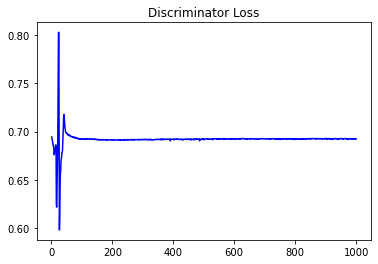

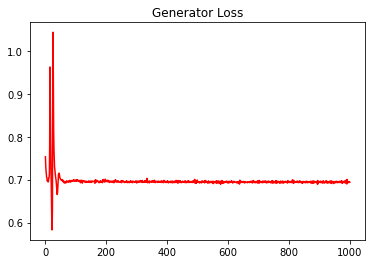

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.2474352905377837


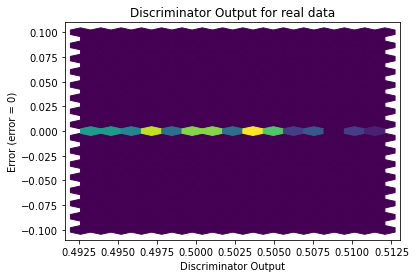

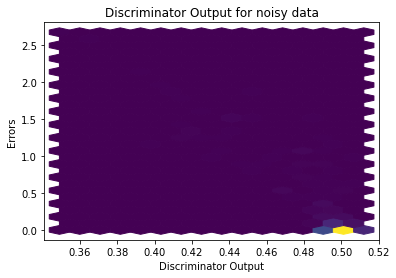

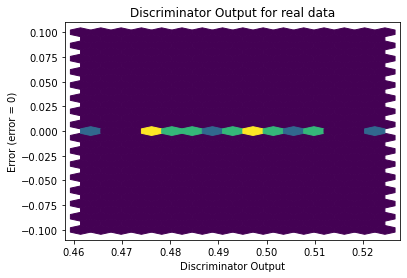

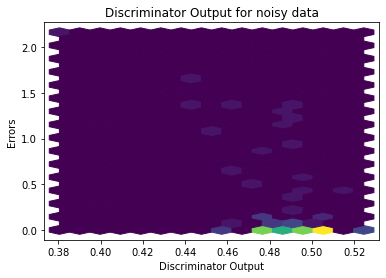

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


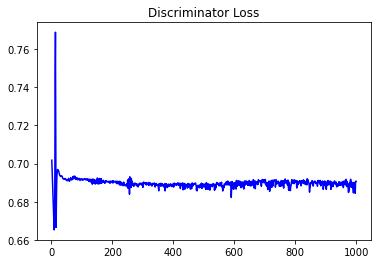

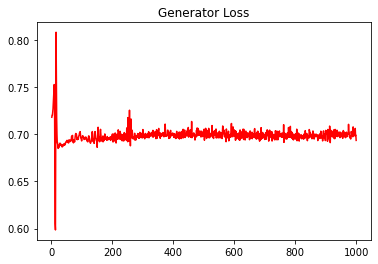

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.63661162794563


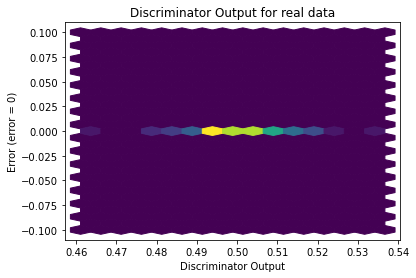

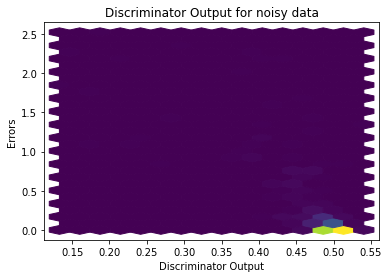

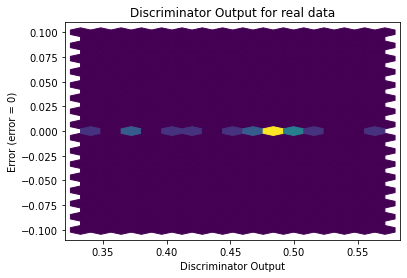

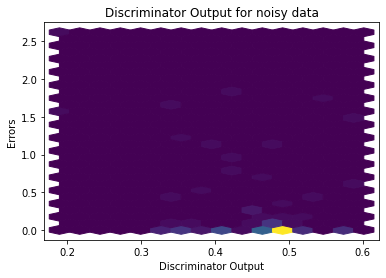

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1375]], requires_grad=True)
